# Data Exploration Notebook

### Objectives:

**Answer business requirements:** 
- The client is interested in adjusting the pricing of paid courses to maximize revenue while maintaining competitive advantage in the market.
- The client wants to know the best-performing courses to feature in marketing campaigns to drive more traffic and sales.
- The client is interested in optimizing the course content (e.g., number of lectures, content duration) to improve engagement and student retention.

### Inputs:

outputs/datasets/cleaned/cleanedDataset.csv

### Outputs:

generate code that answers business requirements

### 1. Import libraries and get the current directory path

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

current_dir = os.getcwd()

In [8]:
current_dir

'/Users/panda/Desktop/code_institue_projects/portfolio-projects/learning_trends_analyzer/jupyter_notebooks'

In [7]:
# In case you want to go one directory back

os.chdir(os.path.dirname(current_dir))
current_dir

'/Users/panda/Desktop/code_institue_projects/portfolio-projects/learning_trends_analyzer/jupyter_notebooks'

### 2. Grab five rows from the dataframe

In [11]:
df = pd.read_csv(f"outputs/datasets/cleaned/cleanedDataset.csv")
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,1,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,1,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,1,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,1,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,1,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance


### 3. Retrieve Statistical summary and dataset information

In [13]:
df.describe()

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.672000e+03,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,6.758977e+05,0.915577,66.102941,3190.586874,156.371460,40.140251,4.097603
std,3.430720e+05,0.278058,61.035920,9488.105448,936.178649,50.417102,6.057830
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.077615e+05,1.000000,20.000000,111.750000,4.000000,15.000000,1.000000
50%,6.876920e+05,1.000000,45.000000,912.000000,18.000000,25.000000,2.000000
75%,9.608140e+05,1.000000,95.000000,2548.750000,67.000000,46.000000,4.500000
max,1.282064e+06,1.000000,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3672 non-null   int64  
 1   course_title         3672 non-null   object 
 2   url                  3672 non-null   object 
 3   is_paid              3672 non-null   int64  
 4   price                3672 non-null   int64  
 5   num_subscribers      3672 non-null   int64  
 6   num_reviews          3672 non-null   int64  
 7   num_lectures         3672 non-null   int64  
 8   level                3672 non-null   object 
 9   content_duration     3672 non-null   float64
 10  published_timestamp  3672 non-null   object 
 11  subject              3672 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 344.4+ KB


### **Case Study 1: Pricing Strategy for Paid Courses**

#### **Problem Definition:**
The client is interested in adjusting the pricing of paid courses to maximize revenue while maintaining competitive advantage in the market.

#### **Analysis Steps:**
1. **Course Price Distribution:** Analyze the price distribution of paid courses to understand the current pricing strategy. Identify the range of prices and any pricing clusters.
2. **Course Popularity vs Price:** Analyze the relationship between course price and popularity (measured by number of subscribers). Determine if there is a significant correlation between higher-priced courses and more or fewer subscribers.
3. **Subject-wise Price Analysis:** Evaluate how different subjects are priced. Are technical or niche subjects priced higher than general knowledge courses? This can indicate if courses are priced based on demand or complexity.
4. **Level vs Price:** Check if advanced-level courses are priced significantly higher than beginner-level ones.

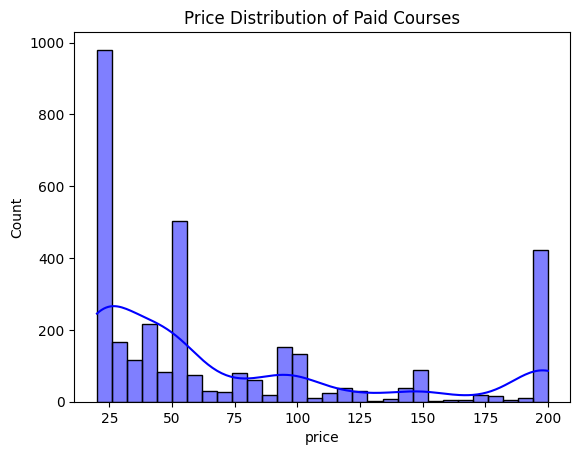

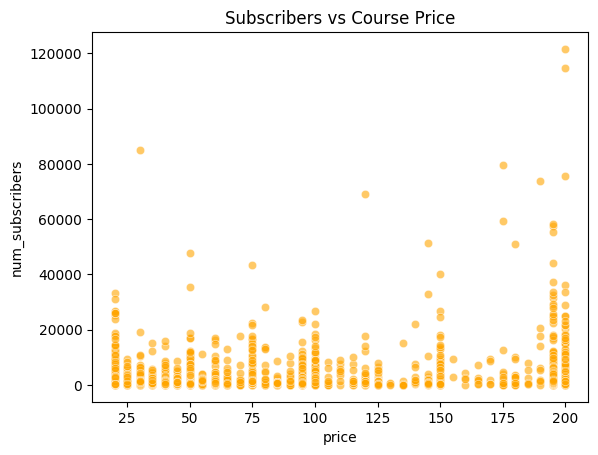

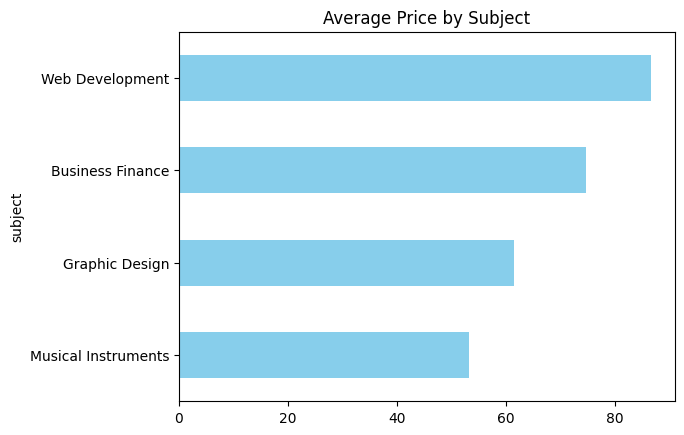

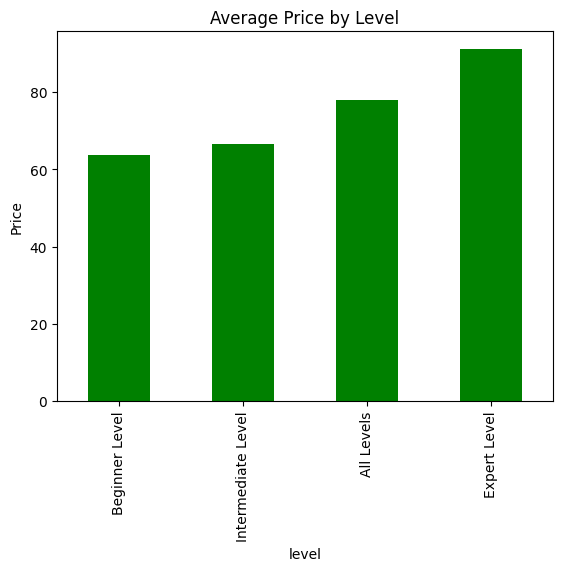

In [17]:
# Price Distribution
paid_courses = df[df['is_paid'] == True]
sns.histplot(paid_courses['price'], bins=30, kde=True, color='blue')
plt.title("Price Distribution of Paid Courses")
plt.show()

# Subscribers vs Price
sns.scatterplot(data=paid_courses, x='price', y='num_subscribers', alpha=0.6, color='orange')
plt.title("Subscribers vs Course Price")
plt.show()

# Subject-wise Price Analysis
subject_price = paid_courses.groupby('subject')['price'].mean().sort_values()
subject_price.plot(kind='barh', color='skyblue')
plt.title("Average Price by Subject")
plt.show()

# Level vs Price
level_price = paid_courses.groupby('level')['price'].mean().sort_values()
level_price.plot(kind='bar', color='green')
plt.title("Average Price by Level")
plt.ylabel("Price")
plt.show()

#### **Actual Insights**:

- From the "price disturibution" graph, the client can identify that the lower the price of the course subscribers are more likely to enroll in that course.

- From the "subscriber vs reviews" graph, it is evident that users like to review the course if the price is high.

- "Average price by subject" graph shows that web development courses has the most subscribers, then comes the business finance, graphic design and then the musical instruments.

- The "Average price by level" graph indicates that advanced-level courses are the most expensive, as they refine your skills, justifying the higher cost.

### **Case Study 2: Identifying Top Performing Courses for Marketing Campaigns**

#### **Problem Definition:**
The client wants to know the best-performing courses to feature in marketing campaigns to drive more traffic and sales.

#### **Analysis Steps:**
1. **Identify Top Courses:** Use the `num_subscribers` and `num_reviews` columns to identify the top-performing courses. High subscriber and review numbers indicate that a course is likely to be popular and well-received.
2. **Course Performance by Subject:** Evaluate which subjects have the highest number of subscribers. This can help in targeting the marketing campaign towards popular subjects.
3. **Reviews Analysis:** Courses with high reviews may have a positive reputation, making them ideal candidates for marketing. A course with many positive reviews could be a good selling point.
4. **Paid vs Free Courses:** Understand if free courses perform better than paid ones in terms of subscribers and reviews, which can help in adjusting marketing efforts for both paid and free courses.

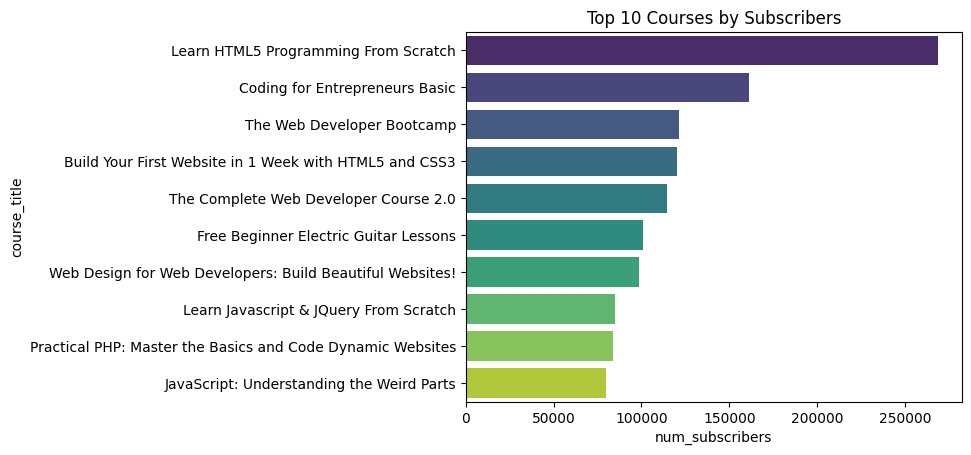

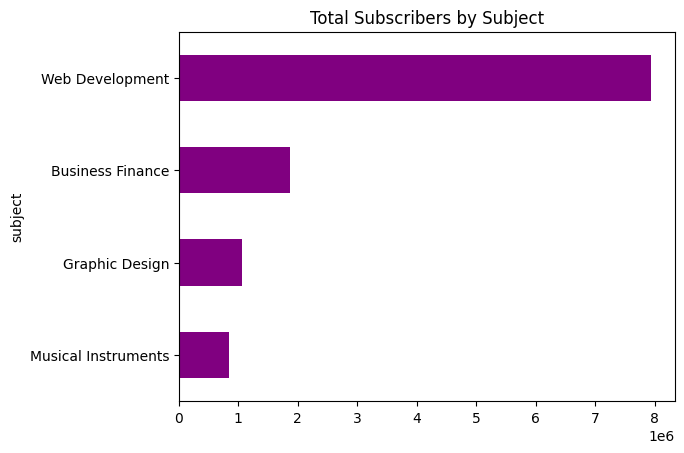

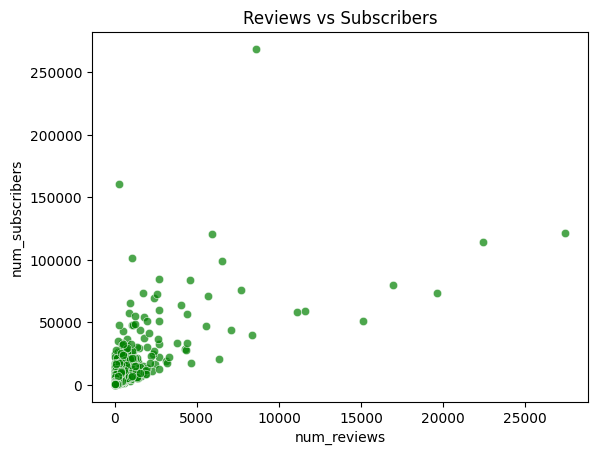

                                           course_title  num_subscribers
3224                         The Web Developer Bootcamp           121584
3226              The Complete Web Developer Course 2.0           114512
2613             Learn Javascript & JQuery From Scratch            84897
3241          JavaScript: Understanding the Weird Parts            79612
1974  Pianoforall - Incredible New Way To Learn Pian...            75499
3198  Angular 4 (formerly Angular 2) - The Complete ...            73783
2695                Become a Web Developer from Scratch            69186
3240                     Learn and Understand AngularJS            59361
3245                        Learn and Understand NodeJS            58208
2656  The Complete HTML & CSS Course - From Novice T...            57422                                            course_title  num_subscribers
2821               Learn HTML5 Programming From Scratch           268923
3026                     Coding for Entrepreneurs B

In [19]:
# Top Performing Courses by Subscribers
top_courses = df.nlargest(10, 'num_subscribers')[['course_title', 'num_subscribers']]
sns.barplot(data=top_courses, y='course_title', x='num_subscribers', palette='viridis', hue='course_title', )
plt.title("Top 10 Courses by Subscribers")
plt.show()

# Top Performing Subjects
subject_performance = df.groupby('subject')['num_subscribers'].sum().sort_values()
subject_performance.plot(kind='barh', color='purple')
plt.title("Total Subscribers by Subject")
plt.show()

# Reviews and Subscribers Relationship
sns.scatterplot(data=df, x='num_reviews', y='num_subscribers', alpha=0.7, color='green')
plt.title("Reviews vs Subscribers")
plt.show()

# Paid vs Free Courses Performance
performance_paid = df[df['is_paid'] == True].nlargest(10, 'num_subscribers')[['course_title', 'num_subscribers']]
performance_free = df[df['is_paid'] == False].nlargest(10, 'num_subscribers')[['course_title', 'num_subscribers']]
print(performance_paid, performance_free)

#### **Actual Insights**:

- The "Top Ten Courses by Subscribers" and "Total Subscribers by Subject" graphs reveal that all listed courses have over 60,000 subscribers, with the top-ranked course exceeding 250,000 subscribers. Furthermore, the majority of these top ten courses are related to web development, suggesting that this subject is particularly popular among users.